In [2]:
from tensorflow.keras import backend as K
K.clear_session()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install rarfile

In [5]:
import os
import pandas as pd
import gdown
import rarfile
import shutil
from PIL import Image
# Download the RAR file
url = 'https://drive.google.com/uc?id=1rHAHyhvr_0adToHaxvSaWgPa3h3PPvoO'
output_rar = '/content/Dataset_CT-Scan.rar'
gdown.download(url, output_rar, quiet=False)
# Extract the RAR file
with rarfile.RarFile(output_rar, 'r') as rar_ref:
    rar_ref.extractall('/content')

Downloading...
From: https://drive.google.com/uc?id=1rHAHyhvr_0adToHaxvSaWgPa3h3PPvoO
To: /content/Dataset_CT-Scan.rar
100%|██████████| 9.03M/9.03M [00:00<00:00, 25.9MB/s]


In [6]:
# Path to the extracted dataset folder

dataset = '/content/Dataset_CT-Scan'

## **CT-Scan**

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenet_1.00_224 (Functional)      │ (None, 7, 7, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,288,714 (16.36 MB)

 Trainable params: 1,059,850 (4.04 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

Found 767 images belonging to 3 classes.
Found 109 images belonging to 3 classes.
Found 221 images belonging to 3 classes.
Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 232ms/step - accuracy: 0.6420 - loss: 1.0565 - val_accuracy: 0.8165 - val_loss: 0.5214
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.8396 - loss: 0.4560 - val_accuracy: 0.8716 - val_loss: 0.3699
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.8717 - loss: 0.3311 - val_accuracy: 0.9083 - val_loss: 0.3314
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.8968 - loss: 0.2769 - val_accuracy: 0.8899 - val_loss: 0.2838
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9261 - loss: 0.2196 - val_accuracy: 0.9358 - val_loss: 0.2562
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9610 - loss: 0.1830 - val_accuracy: 0.9358 - val_loss: 0.2351
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9522 - loss: 0.1724 - val_accuracy: 0.9450 - val

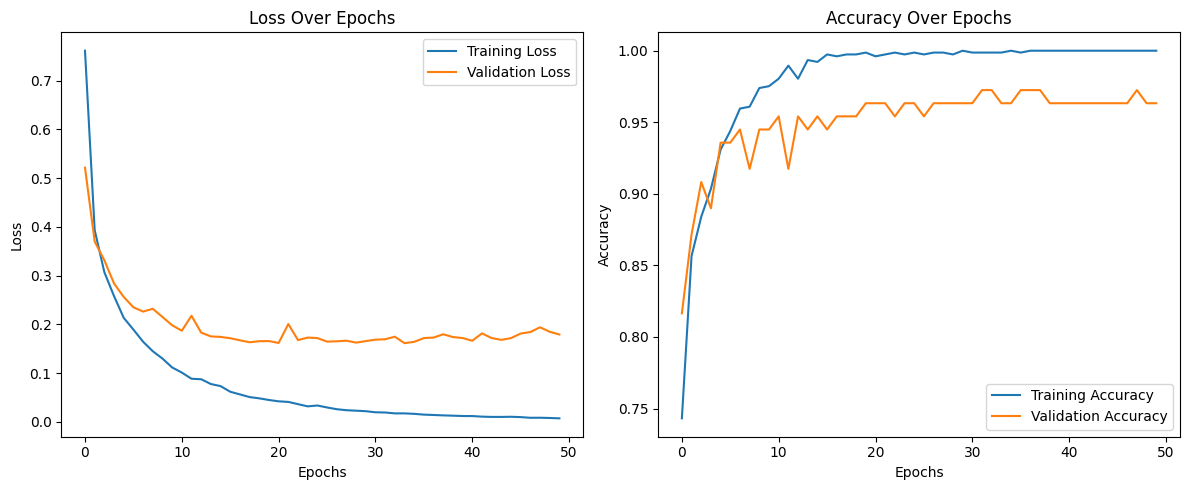

7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 723ms/step

Performance on Test Data
Precision: 0.9486876222535596
Recall: 0.9502262443438914
F1 Score: 0.9480516952662956
Accuracy: 0.9502262443438914
Confusion Matrix:
                  Bengin cases  Malignant cases  Normal cases
Bengin cases               16                0             8
Malignant cases             0              113             0
Normal cases                3                0            81


In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Directory for the dataset
data_dir = dataset

# Load MobileNet with pre-trained ImageNet weights, excluding the top layers
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model to prevent training them
base_model.trainable = False

# Add custom layers on top of the base model
inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)  # Adjust the number of classes as needed

# Create the model
model = Model(inputs, outputs)

# Print the model summary
model.summary()

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators for training, validation, and testing
train_generator = train_datagen.flow_from_directory(
    os.path.join(data_dir, 'Train'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(data_dir, 'Validate'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(data_dir, 'Test'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

# Training the model
history = model.fit(train_generator, epochs=50, validation_data=val_generator)

# Plot training results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Helper function to evaluate the model on given test generator
def evaluate_model(test_generator, model, classes, title="Performance"):
    y_test_pred = model.predict(test_generator)
    y_test_pred = np.argmax(y_test_pred, axis=1)

    precision = precision_score(test_generator.labels, y_test_pred, average='weighted')
    recall = recall_score(test_generator.labels, y_test_pred, average='weighted')
    f1 = f1_score(test_generator.labels, y_test_pred, average='weighted')
    accuracy = accuracy_score(test_generator.labels, y_test_pred)

    print(f"\n{title}")
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Accuracy:", accuracy)

    # Display the confusion matrix
    confusion = confusion_matrix(test_generator.labels, y_test_pred)
    confusion_df = pd.DataFrame(confusion, index=classes, columns=classes)
    print("Confusion Matrix:\n", confusion_df)

# Test the model on the test set
evaluate_model(test_generator, model, ['Bengin cases', 'Malignant cases', 'Normal cases'], title="Performance on Test Data")
